In [1]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import dedalus.public as d3

import sys
sys.path.append("../../../dedalus_subroutines")
from isospectrum import isospectrum

In [57]:
# R_bet_input_ary = [1,2,4,6,10,20,50]
R_bet_input_ary = [0,2,4,10,20,50]

fig = plt.figure(1, figsize=(15/2.5, 12/2.5))

<Figure size 600x680 with 0 Axes>

0
1
2
3
4
5


NotADirectoryError: [Errno 20] Not a directory: 'figs/Gyre_munk_zetaall.pdf'

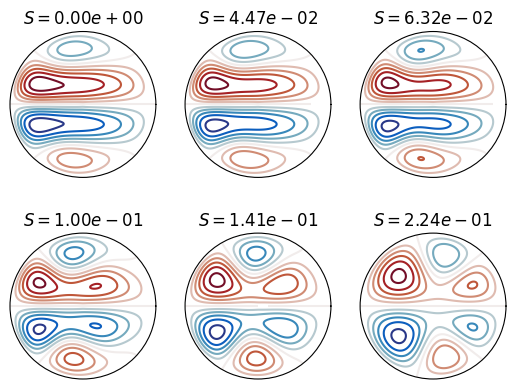

In [61]:
for i in range(6):
    print(i)
    R_bet_input = R_bet_input_ary[i]
    R_bet = R_bet_input/1e3
    S = R_bet**0.5
    
    file_nm = "Gyre_munknonlin_%i_" %R_bet_input
    snapname = "../"+file_nm+"snap/"+file_nm+"snap_s1.h5"

    with h5py.File(snapname, mode='r') as file:

        Q_data = np.squeeze(np.array(file['tasks']['Q']))
#         print(Q_data.shape)
        PSI_data = np.squeeze(np.array(file['tasks']['PSI']))
        BETA_data = np.squeeze(np.array(file['tasks']['BETA']))

        sim_time_ary = np.array(file['scales']['sim_time'])
#         print(sim_time_ary)

        r = np.array(file['scales'][list(file['scales'])[2]])
        th = np.array(file['scales'][list(file['scales'])[4]])
        
    
    time_idx = -1

    fig = plt.figure(1)
    ax = fig.add_subplot(2,3,i+1, polar=True); ax.grid(False); plt.xticks([]); plt.yticks([]) 
    pc = ax.contour(th.T,r.T,(PSI_data[time_idx,:,:]).T, 11, cmap=cmo.balance, norm=colors.CenteredNorm())
#     fig.colorbar(pc); 
    plt.title("$S=%.2e$" %S)

plt.savefig("figs/Gyre_munk_zetaall.pdf", bbox_inches='tight')
plt.show()

In [62]:
plt.savefig("figs/Gyre_munk_zetaall.pdf", bbox_inches='tight')

NotADirectoryError: [Errno 20] Not a directory: 'figs/Gyre_munk_zetaall.pdf'

<Figure size 640x480 with 0 Axes>

Exception ignored in atexit callback: <bound method InteractiveShell.atexit_operations of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x14d97345d3f0>>
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3875, in atexit_operations
    self._atexit_once()
  File "/ext3/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3854, in _atexit_once
    self.reset(new_session=False)
  File "/ext3/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 1373, in reset
    self.history_manager.reset(new_session)
  File "/ext3/miniconda3/lib/python3.10/site-packages/IPython/core/history.py", line 597, in reset
    self.dir_hist[:] = [Path.cwd()]
  File "/ext3/miniconda3/lib/python3.10/pathlib.py", line 993, in cwd
    return cls(cls._accessor.getcwd())
FileNotFoundError: [Errno 2] No such file or directory


In [54]:
R_bet_input = 50

file_nm = "Gyre_munknonlin_%i_" %R_bet_input
snapname = "../"+file_nm+"snap/"+file_nm+"snap_s1.h5"
diagname = "../"+file_nm+"diag/"+file_nm+"diag_s1.h5"

with h5py.File(snapname, mode='r') as file:
    
    Q_data = np.squeeze(np.array(file['tasks']['Q']))
    print(Q_data.shape)
    PSI_data = np.squeeze(np.array(file['tasks']['PSI']))
    BETA_data = np.squeeze(np.array(file['tasks']['BETA']))
    
    sim_time_ary = np.array(file['scales']['sim_time'])
    print(sim_time_ary)
    
    r = np.array(file['scales'][list(file['scales'])[2]])
    th = np.array(file['scales'][list(file['scales'])[4]])

(100, 512, 256)
[  0.           3.0000011    6.0000011    9.0000011   11.99370176
  14.99769102  18.00672171  20.99148741  24.0033681   26.99807905
  29.99611955  33.00775413  35.99471164  38.99948369  42.0014783
  45.00525674  48.00590535  51.00699966  53.99328524  56.99268967
  60.00269281  62.9932476   65.99442967  68.99440807  71.99732965
  74.99430363  78.00503228  80.99374625  83.99336771  86.99419719
  89.99945551  92.99694902  96.00122317  98.99847785 102.00241096
 104.99838392 107.99974553 111.0058156  114.00184318 117.00146122
 120.00434831 122.99613619 126.0051065  129.00285049 132.00353993
 134.99288431 137.99924172 140.99392922 144.00520608 147.00420943
 150.00484691 153.00674341 155.99522933 158.99856055 162.00213718
 165.00570673 167.99476993 170.99778551 174.00035364 177.00241699
 180.00394933 183.00494648 186.00541823 189.00538197 192.00485814
 195.00386757 198.00243035 201.00056593 203.99829377 206.99563447
 210.00688117 213.00351679 215.99984191 218.99588777 222.0059

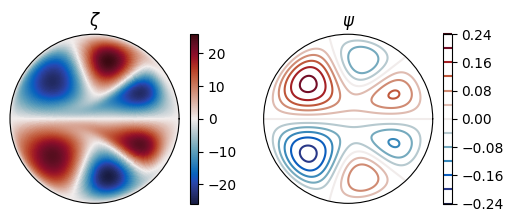

In [55]:
time_idx = -1

fig = plt.figure(figsize=(15/2.5, 5.5/2.5))

ax = fig.add_subplot(121, polar=True); ax.grid(False); plt.xticks([]); plt.yticks([]) 
pc = ax.pcolormesh(th.T,r.T,(Q_data[time_idx,:,:]-BETA_data[time_idx,:,:]).T, cmap=cmo.balance, norm=colors.CenteredNorm())
fig.colorbar(pc); 
plt.title("$\zeta$")

ax = fig.add_subplot(122, polar=True); ax.grid(False); plt.xticks([]); plt.yticks([]) 
rads = np.arange(0, (2 * np.pi), 0.01)
pc = ax.contour(th.T,r.T,(PSI_data[time_idx,:,:]).T, 11, cmap=cmo.balance, norm=colors.CenteredNorm())
fig.colorbar(pc); 
plt.title("$\psi$")

# plt.savefig("figs/Gyre_munk_zetapsi_%i.png" %R_bet_input, bbox_inches='tight', dpi=400)
plt.show()

(591,)


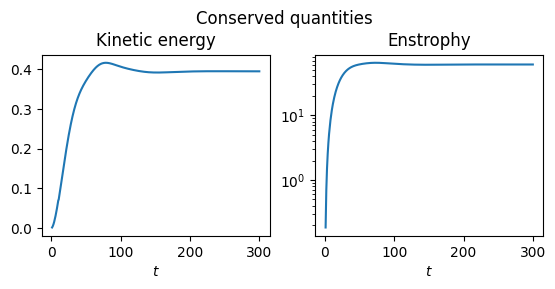

0.3943833065770636


In [56]:
with h5py.File(diagname, mode='r') as file:
    
    KE_data = np.squeeze(np.array(file['tasks']['KE']))
    Ens_data = np.squeeze(np.array(file['tasks']['Enstrophy']))
    print(Ens_data.shape)
    
    diag_time_ary = np.array(file['scales']['sim_time'])
#     print(diag_time_ary)

fig=plt.figure(figsize=(11/1.7, 4/1.7))
# fig=plt.figure(figsize=(11, 4))
fig.suptitle('Conserved quantities', y=1.07)
plt.subplot(1, 2, 1)
plt.plot(diag_time_ary[1:],KE_data[1:])
plt.xlabel('$t$')
plt.title('Kinetic energy')

# p.change_scales(1)
plt.subplot(1, 2, 2)
plt.semilogy(diag_time_ary[1:],Ens_data[1:])
plt.xlabel('$t$')
plt.title('Enstrophy')

# plt.savefig('figs/2DEuler_energy.pdf', bbox_inches='tight')
plt.show()

print(KE_data[-1])